In [38]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Diamond data from Seaborn

In [39]:
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


# Use heatmap to identify correlation

<AxesSubplot:>

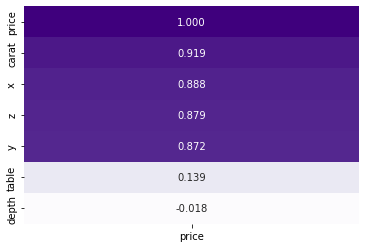

In [40]:
#using the corr() method and sorting the data
df = data.corr()[['price']].sort_values(by='price', ascending=False)

sns.heatmap(data=df, annot=True, fmt='.3f', cmap='Purples', cbar=False)

# Splitting the data from Linear Regression Model

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data[['carat']], data[['price']], test_size=0.3, random_state=30)

# Creating LinearRegression object

In [42]:
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(y_train.mean())

linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

# Validate the Regression model

In [43]:
linearModel.score(x_test, y_test)

0.8437532672742369

# Predicting the data with the model

In [44]:
y_predicted = linearModel.predict(x_test)
y_predicted

array([[ 5606.04659131],
       [ 3678.93990396],
       [ 1289.32761164],
       ...,
       [ 5683.1308588 ],
       [  441.40066921],
       [13314.4733407 ]])

# Putting the predicted values in a DataFrame

In [45]:
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])
predicted.head()

,price_predicted
0,5606.046591
1,3678.939904
2,1289.327612
3,364.316402
4,980.990542


# Joining the y_test and predicted data with the x_test data

In [46]:
combined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head()

,price_predicted,carat,price
0,5606.046591,1.00,7002.0
1,3678.939904,0.75,3002.0
2,1289.327612,0.44,990.0
3,364.316402,0.32,842.0
4,980.990542,0.40,737.0


# Melt the actual and predicted price columns together

In [47]:
melted = pd.melt(combined, id_vars=['carat'], value_vars=['price_predicted', 'price'], var_name='price_type', value_name='price_value')
melted.head()

,carat,price_type,price_value
0,1.00,price_predicted,5606.046591
1,0.75,price_predicted,3678.939904
2,0.44,price_predicted,1289.327612
3,0.32,price_predicted,364.316402
4,0.40,price_predicted,980.990542


# Plotting the data in a Seaborn Line plot

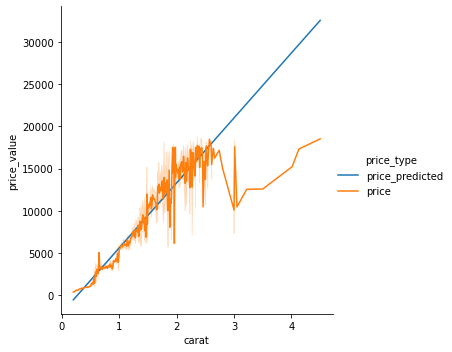

In [48]:
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type')